# Netflix Movies and TV Shows Analysis

The original dataset consists of tv shows and movies available on <strong>Netflix</strong> as of January of 2021

Dataset available on https://www.kaggle.com/shivamb/netflix-shows

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

# Loading and checking dataset

In [2]:
netflix = pd.read_csv('netflix_titles.csv')

In [3]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [5]:
netflix.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [6]:
number_of_shows = netflix[netflix['type'] == 'TV Show'].shape[0]
number_of_movies = netflix[netflix['type'] == 'Movie'].shape[0]
number_of_titles = netflix.shape[0]
print(f'There were {number_of_titles} titles available on Netflix in 2019\n{number_of_movies} Movies and {number_of_shows} TV Shows')

There were 7787 titles available on Netflix in 2019
5377 Movies and 2410 TV Shows


# Data Cleaning

## Dealing with missing information

### Director

In [7]:
netflix.director.value_counts()

Raúl Campos, Jan Suter     18
Marcus Raboy               16
Jay Karas                  14
Cathy Garcia-Molina        13
Martin Scorsese            12
                           ..
Pierfrancesco Diliberto     1
Maris Curran                1
Marc Levin                  1
Dileep Narayanan            1
Danish Aslam                1
Name: director, Length: 4049, dtype: int64

This information doesn't seem to be relevant, so we'll be dropping this information from our DataFrame

In [8]:
netflix.drop(['director'], axis = 1, inplace = True)

### Rating

There are only 7 NaN Ratings, so we'll be fixing this manually

In [9]:
netflix[netflix.rating.isna()]

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
67,s68,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
2359,s2360,TV Show,Gargantia on the Verdurous Planet,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
3660,s3661,TV Show,Little Lunch,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
3736,s3737,Movie,Louis C.K. 2017,Louis C.K.,United States,"April 4, 2017",2017,NaN,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
3737,s3738,Movie,Louis C.K.: Hilarious,Louis C.K.,United States,"September 16, 2016",2010,NaN,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
3738,s3739,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,United States,"August 15, 2016",2015,NaN,66 min,Movies,The comic puts his trademark hilarious/thought...
4323,s4324,Movie,My Honor Was Loyalty,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [10]:
# Ratings according to IMDB and Netflix
fixing_rating = {67: 'TV-PG', 2359: 'TV-14', 3660: 'TV-MA', 3736: 'TV-MA', 3737: 'TV-MA', 3738: 'TV-MA', 4323: 'PG-13'}

In [11]:
rating_column = netflix.columns.get_loc('rating')

for item_id, item_rating in fixing_rating.items():
    netflix.iloc[item_id, rating_column] = item_rating

In [12]:
netflix['rating'].isna().sum()

0

### Cast and Date_Added

We'll be using the 'cast' and 'date_added' in our analysis, so we'll be dropping the NaN values in these rows

In [13]:
netflix = netflix[netflix['cast'].notna() & netflix['date_added'].notna()]


### Country

In [14]:
netflix.country.isna().sum()

410

There are a lot of NaN values in this column, so we'll filling them with the most common country

In [15]:
most_common_country = netflix['country'].value_counts().idxmax()
netflix['country'].fillna(most_common_country, inplace = True)

In [16]:
netflix.country.isna().sum()

0

In [17]:
netflix.country.value_counts()

United States                                    2655
India                                             894
United Kingdom                                    331
Japan                                             221
South Korea                                       180
                                                 ... 
United States, Argentina                            1
Cyprus                                              1
United States, Germany, United Kingdom, Italy       1
United States, Chile, Israel                        1
Argentina, Uruguay, Spain, France                   1
Name: country, Length: 626, dtype: int64

There are some rows that contain more than one country, we'll select only the first country listed

In [18]:
netflix['country'] = netflix['country'].apply(lambda x:x.split(',')[0].strip())

In [19]:
netflix.country.value_counts()

United States     2954
India              927
United Kingdom     499
Canada             234
Japan              231
                  ... 
Jordan               1
Somalia              1
Namibia              1
Senegal              1
Cyprus               1
Name: country, Length: 79, dtype: int64

## Deleting irrelevant data

In [20]:
netflix.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [21]:
netflix.drop(['show_id', 'title', 'duration', 'description', ], axis = 1, inplace = True)
netflix.columns

Index(['type', 'cast', 'country', 'date_added', 'release_year', 'rating',
       'listed_in'],
      dtype='object')

## Adding new columns

We'll be adding 2 new columns:
- Month_Added --> in which month of the year the movie/show was added to netflix
- Year_Added --> in which year the movie/show was added to netflix
- Season_Added --> in which season of the year the movie/show was added to netflix

In [22]:
netflix['Month_Added'] = netflix['date_added'].apply(lambda x:x.split(',')[0].strip().split(' ')[0])

In [23]:
netflix['Year_Added'] = netflix['date_added'].apply(lambda x:x.split(',')[1].strip())

In [24]:
spring_months = ('March', 'April', 'May')
summer_months = ('June', 'July', 'August')
fall_months = ('September', 'October', 'November')
winter_months = ('December', 'January', 'February')

netflix['Season_Added'] = netflix['Month_Added'].apply(lambda x:'Spring' if x in spring_months else ('Summer' if x in summer_months else ('Fall' if x in fall_months else ('Winter' if x in winter_months else ''))))

In [25]:
netflix.drop(['date_added'], axis = 1, inplace = True)

## Renaming Columns

In [26]:
netflix.rename(columns={'type': 'Type', 
                        'cast': 'Cast', 
                        'country': 'Country', 
                        'release_year': 'Year_Released', 
                        'rating': 'Rating',
                        'listed_in': 'Genres'}, inplace = True)
netflix.head()

,Type,Cast,Country,Year_Released,Rating,Genres,Month_Added,Year_Added,Season_Added
0,TV Show,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,"International TV Shows, TV Dramas, TV Sci-Fi &...",August,2020,Summer
1,Movie,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,"Dramas, International Movies",December,2016,Winter
2,Movie,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,"Horror Movies, International Movies",December,2018,Winter
3,Movie,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,"Action & Adventure, Independent Movies, Sci-Fi...",November,2017,Fall
4,Movie,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,Dramas,January,2020,Winter


# Data Visualization

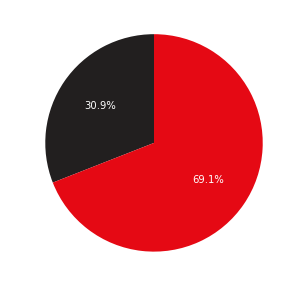

In [27]:
values = [number_of_shows, number_of_movies]
labels = ['TV Shows', 'Movies']
colors = ['#221F1F', '#E50914']
plt.figure(figsize=(15,5))
plt.pie(values, labels=labels, startangle=90, colors=colors, autopct='%1.1f%%', textprops={'color': 'w'})
plt.show()

We'll be analyzing the data in 3 perspectives:
- Netflix TV Shows
- Netflix Movies
- Netflix Catalogue (TV Shows + Movies)

In [28]:
# Creating separated DataFrames for TV Shows and Movies
netflix_shows = netflix[netflix['Type'] == 'TV Show']
netflix_movies = netflix[netflix['Type'] == 'Movie']

In [29]:
print(f'{netflix_shows.shape[0]} TV Shows and {netflix_movies.shape[0]} Movies')

2108 TV Shows and 4951 Movies


### Most common countries

In [30]:
productions_per_country = netflix.Country.value_counts().head(10)
shows_per_country = netflix_shows.Country.value_counts().head(10)
movies_per_country = netflix_movies.Country.value_counts().head(10)

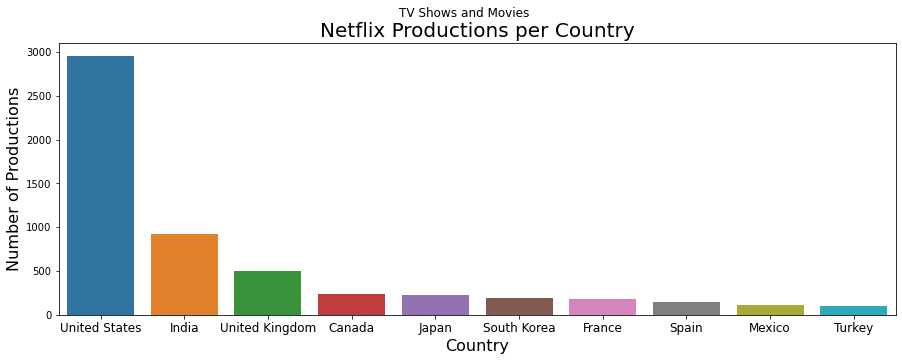

In [31]:
plt.figure(figsize=(15,5))
plt.title('Netflix Productions per Country', fontsize=20)
plt.suptitle('TV Shows and Movies')
plt.ylabel('Number of Productions', fontsize=16)
plt.xlabel('Country', fontsize=16)
plt.xticks(fontsize=12)
sns.barplot(x = productions_per_country.index, y = productions_per_country.values)
plt.show()

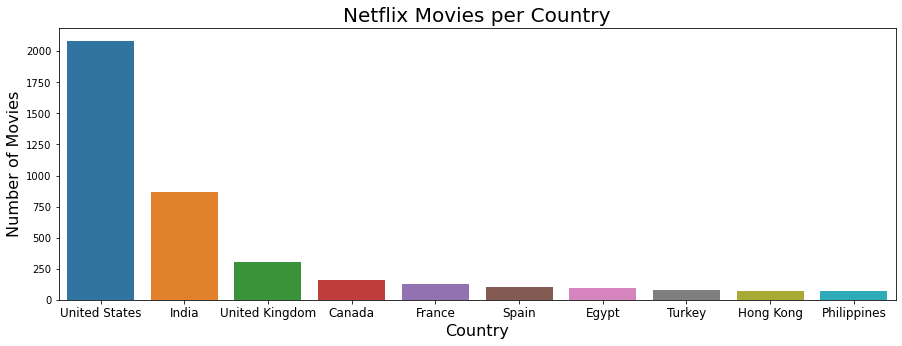

In [32]:
plt.figure(figsize=(15,5))
plt.title('Netflix Movies per Country', fontsize=20)
plt.ylabel('Number of Movies', fontsize=16)
plt.xlabel('Country', fontsize=16)
plt.xticks(fontsize=12)
sns.barplot(x = movies_per_country.index, y = movies_per_country.values)
plt.show()

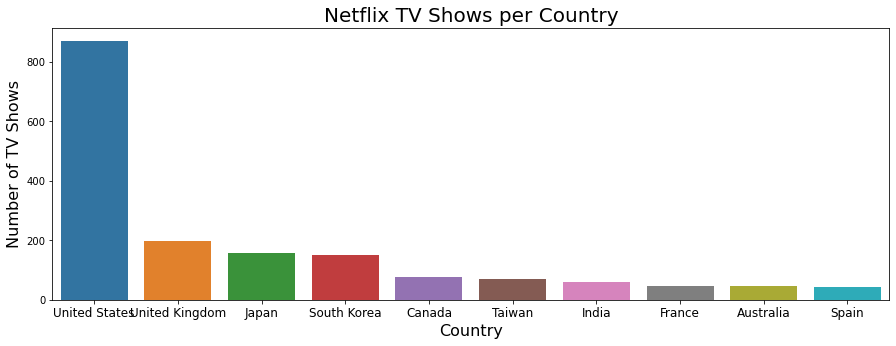

In [33]:
plt.figure(figsize=(15,5))
plt.title('Netflix TV Shows per Country', fontsize=20)
plt.ylabel('Number of TV Shows', fontsize=16)
plt.xlabel('Country', fontsize=16)
plt.xticks(fontsize=12)
sns.barplot(x = shows_per_country.index, y = shows_per_country.values)
plt.show()

- <strong>United</strong> States has the most productions in <strong>both categories</strong>: Movies and TV Shows
- <strong>India</strong> appears on both, but focuses in the production of <strong>Movies</strong>
- <strong>Japan</strong> and <strong>South Korea</strong> have a lot of <strong>TV Shows</strong>, but few Movies

### Number of additions per year

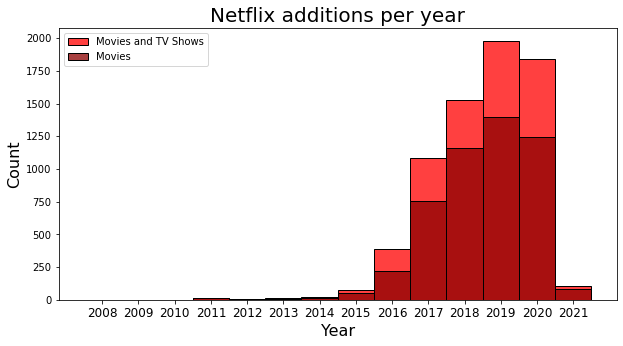

In [34]:
movies_per_year = netflix_movies.sort_values(by='Year_Added')['Year_Added']
additions_per_year = netflix.sort_values(by='Year_Added')['Year_Added']

plt.figure(figsize=(10,5))
plt.title('Netflix additions per year', fontsize=20)
plt.ylabel('Count', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.xticks(fontsize=12)
sns.histplot(additions_per_year, kde=False, color='r')
sns.histplot(movies_per_year, kde=False, color='#8B0000')
plt.legend(('Movies and TV Shows', 'Movies'))
plt.show()

### Number of additions per month

In [35]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
netflix['Month_Added'] = pd.Categorical(netflix['Month_Added'], categories=months, ordered=True)
additions_per_month = netflix.sort_values(by='Month_Added')['Month_Added']

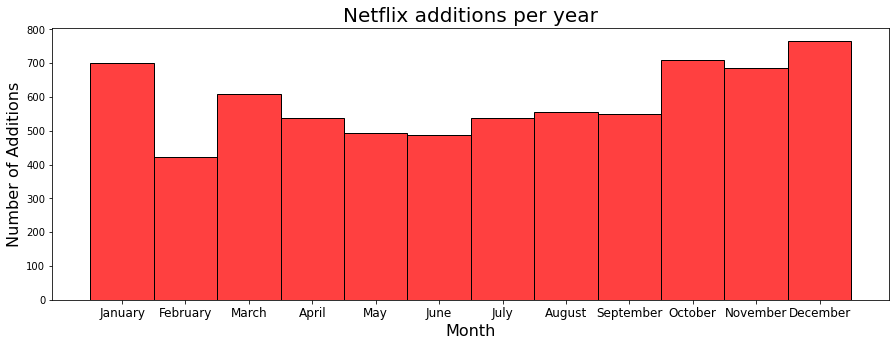

In [36]:
plt.figure(figsize=(15,5))
plt.title('Netflix additions per year', fontsize=20)
plt.ylabel('Number of Additions', fontsize=16)
plt.xlabel('Month', fontsize=16)
plt.xticks(fontsize=12)
sns.histplot(additions_per_month, kde=False, color='r')
plt.show()

### Number of additions per Season of the year

In [37]:
seasons = ['Spring', 'Summer', 'Fall', 'Winter']
netflix['Season_Added'] = pd.Categorical(netflix['Season_Added'], categories=seasons, ordered=True)
additions_per_season = netflix.sort_values(by='Season_Added')['Season_Added']

warm_seasons = additions_per_season[additions_per_season.values.isin(['Spring', 'Summer'])]
cold_seasons = additions_per_season[additions_per_season.values.isin(['Fall', 'Winter'])]

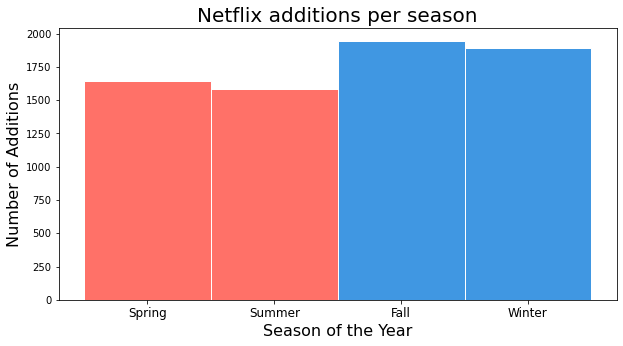

In [38]:
plt.figure(figsize=(10,5))
colors = ['b', 'b', 'r', 'r']
plt.title('Netflix additions per season', fontsize=20)
plt.ylabel('Number of Additions', fontsize=16)
plt.xlabel('Season of the Year', fontsize=16)
plt.xticks(fontsize=12)
sns.histplot(warm_seasons, kde=False, color='#FF4136', edgecolor='white')
sns.histplot(cold_seasons, kde=False, color='#0074D9', edgecolor='white')
plt.show()

In [144]:
warm_season = warm_seasons.shape[0]
cold_season = cold_seasons.shape[0]
total = warm_season + cold_season
percentage_warm_season = (warm_season / total) * 100
percentage_cold_season = (cold_season / total) * 100
print(f'{percentage_cold_season:.2f}% of the titles were added during the cold seasons of the year (Spring and Winter)')

54.33% of the titles were added during the cold seasons of the year (Spring and Winter)


### Distribution per TV Rating

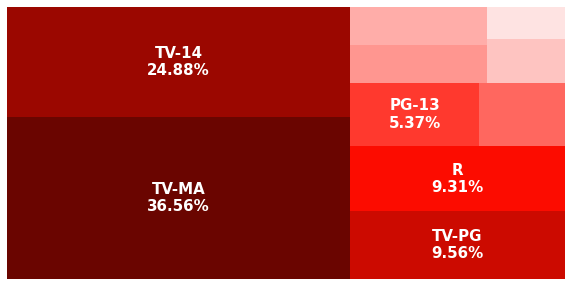

In [147]:
netflix_ratings = netflix.Rating.value_counts().index
ratings_count = netflix.Rating.value_counts().values
ratings_percentage = (ratings_count * 100 / netflix.shape[0]).round(2)
labels = netflix_ratings + '\n' + ratings_percentage.astype('str') + '%'

unique_colors = ['#6a0500', '#9b0700', '#cc0a00', '#fc0c00', '#ff392e', '#ff675f', '#ff9690', '#ffada9', '#fec4c1']
colors = [(unique_colors[x] if x < len(unique_colors) else '#fee3e2') for x in range(ratings_count.shape[0])]

plt.figure(figsize=(10,5))
squarify.plot(sizes=ratings_count, label=labels[:5], color=colors, text_kwargs={'fontsize': 15, 'color': 'white', 'weight': 'bold'})
plt.axis('off')
plt.show()

### Popular Actor/Actress

In [219]:
actor_list = pd.Series((lambda x:x)(x.strip()) for x in ','.join(netflix['Cast']).split(','))
popular_actors = actor_list.value_counts().head(10)
print(f'The total number of actors/actresses that appear on Netflix is {actor_list.nunique()}')

The total number of actors/actresses that appear on Netflix is 32847


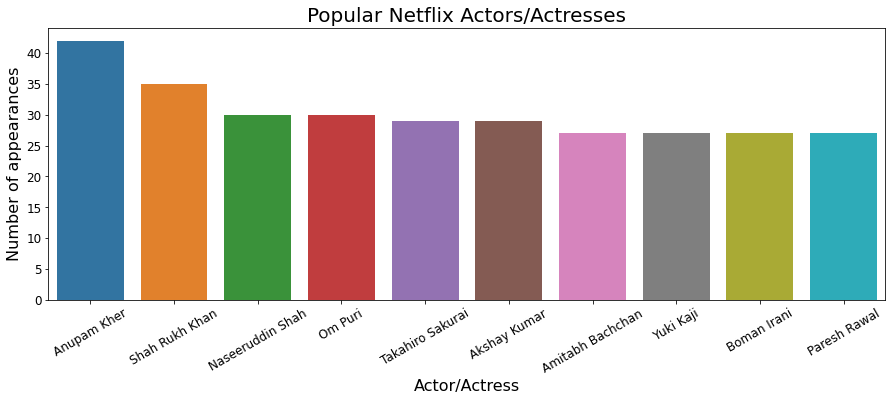

In [218]:
plt.figure(figsize=(15,5))
plt.title('Popular Netflix Actors/Actresses', fontsize=20)
plt.ylabel('Number of appearances', fontsize=16)
plt.xlabel('Actor/Actress', fontsize=16)
plt.xticks(fontsize=12, rotation=30)
plt.yticks(fontsize=12)
sns.barplot(x = popular_actors.index, y = popular_actors.values)
plt.show()

In [229]:
netflix_us = netflix[netflix['Country'] == 'United States']
actor_list_us = pd.Series((lambda x:x)(x.strip()) for x in ','.join(netflix_us['Cast']).split(','))
popular_actors_us = actor_list_us.value_counts().head(10)
print(f'The total number of US actors/actresses that appear on Netflix is {actor_list_us.nunique()}')

The total number of US actors/actresses that appear on Netflix is 13753


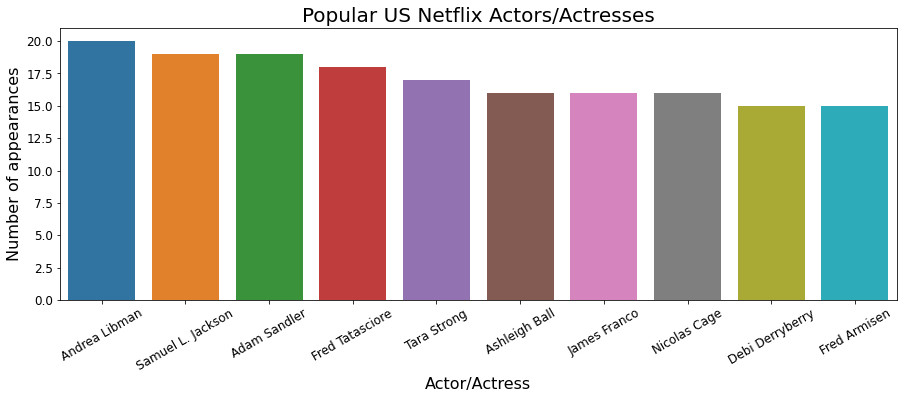

In [228]:
plt.figure(figsize=(15,5))
plt.title('Popular US Netflix Actors/Actresses', fontsize=20)
plt.ylabel('Number of appearances', fontsize=16)
plt.xlabel('Actor/Actress', fontsize=16)
plt.xticks(fontsize=12, rotation=30)
plt.yticks(fontsize=12)
sns.barplot(x = popular_actors_us.index, y = popular_actors_us.values)
plt.show()

### Most common genre

Evolution throughout the years